## Configurações

-   1 - Instalação das dependências necessárias localmente utilizando pip

Shell Script

In [ ]:
!pip3 install pandas numpy matplotlib seaborn

PowerShell

In [ ]:
pip3 install pandas numpy matplotlib seaborn

-   2 - Importando as bibliotecas necessárias c/ apelido

    -   Pandas - Manipulação e análise de dados tabulares.
    -   Numpy - Computação numérica e manipulação de arrays.
    -   Sqlalchemy - Interação com bancos de dados relacionais.
    -   Matplotlib.pyplot - Visualização de dados e criação de gráficos.
    -   Seaborn - Visualização estatística atraente e informativa.

In [241]:
import pandas as pd
import numpy as np
from sqlalchemy import create_engine
import matplotlib.pyplot as plt
import seaborn as sns

---
##   Dataset 

Capturando o conjunto de dados possuindo as informações necessárias.

3 - Definição de um conjunto de parâmetros para a solicitação de download de um arquivo CSV, especificando o hash do arquivo, o diretório de destino e o nome do arquivo.

In [242]:
params = {
    "hash": '1oO3Q_2gIMQcdxj7D0ZqT0UaWYjLIgFQq_tWva_Qhn0I',
    "dst": '.',
    "filename": 'data.csv',
}

4 - Obtendo dados da planilha do Google Sheets, os carregando em um DataFrame do Pandas e, opcionalmente, os salva como um arquivo CSV localmente.

In [244]:
def get_data( hash: str, dst: str, filename: str, save = False ):
    url = f""" https://docs.google.com/spreadsheets/d/{hash}/export?format=csv """
    df = pd.read_csv( url )

    if save:
        df.to_csv( f"""{ dst }/{ filename }""" )

    return df

df_empreg = get_data( **params )

5 - Salvamento do arquivo


In [245]:
file_creator = get_data( **{ **params, "save": True } )

---
##   Dataframe Infos

In [33]:
df_empreg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1038 entries, 0 to 1037
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Nome                     1038 non-null   object
 1   Estado                   1038 non-null   object
 2   Cidade                   1038 non-null   object
 3   Idade                    1038 non-null   int64 
 4   Raça                     1038 non-null   object
 5   Universidade             1038 non-null   object
 6   Curso                    1038 non-null   object
 7   SemestreAtual            1038 non-null   int64 
 8   StatusEmpregaticio       1038 non-null   object
 9   FonteEmprego             1038 non-null   object
 10  TraineeEstag             1038 non-null   object
 11  MaiorDificuldadeEmprego  541 non-null    object
 12  SeEmpregado              497 non-null    object
 13  AreaTrabalho             238 non-null    object
 14  SatisfacTrabalho         497 non-null   

In [35]:
df_empreg.shape

(1038, 18)

<Axes: >

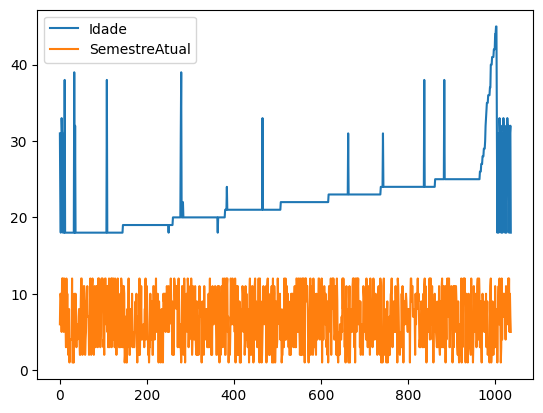

In [36]:
df_empreg.plot()

In [34]:
df_empreg.describe()

,Idade,SemestreAtual
count,1038.000000,1038.000000
mean,22.268786,6.769750
std,4.141193,3.439513
min,18.000000,1.000000
25%,20.000000,4.000000
50%,22.000000,7.000000
75%,24.000000,10.000000
max,45.000000,12.000000


---
##   Dataframe Trat

-   Separando colunas numéricas e de strings para tratamentos posteriores

In [256]:
cols_str = [
    'Nome',
    'Estado',
    'Cidade',
    'Raça',
    'Universidade',
    'Curso',
    'StatusEmpregaticio',
    'FonteEmprego',
    'TraineeEstag',
    'MaiorDificuldadeEmprego',
    'SeEmpregado',
    'AreaTrabalho',
    'SatisfacTrabalho',
    'ModoTrabalho',
    'OpiniaoFaculdadeEmprego',
    'PretenSalarial'
]
cols_num = [
    'Idade',
    'SemestreAtual'    
]

-   Transformando todas as strings em maiúsculas

In [257]:
df_empreg[ cols_str ] = df_empreg[ cols_str ].apply(lambda x: x.str.upper())

-   Ordenando os dados para melhor visualização

In [258]:
df_empreg.sort_values(by='Nome', ascending=False, inplace=True)

#   Cálculos

-   Porcentagem geral por universidade

In [ ]:
perc_uni = df_empreg[['Universidade', 'StatusEmpregaticio', 'SeEmpregado']].value_counts(dropna = False, normalize=True) * 100
perc_uni

-   Porcentagem geral de empregados fora da área por curso

In [ ]:
emp = df_empreg[['Curso', 'Universidade']][df_empreg['SeEmpregado'] == 'FORA DA ÁREA DE ESTUDO'].value_counts(dropna = False, normalize=True) * 100
emp

-   Desempregados

In [ ]:
unem = df_empreg[['Universidade', 'Curso', 'StatusEmpregaticio']][df_empreg['StatusEmpregaticio'] == 'DESEMPREGADO'].value_counts(dropna = False, normalize=True) * 100
unem

#   Gráficos

### Plataformas que mais empregam

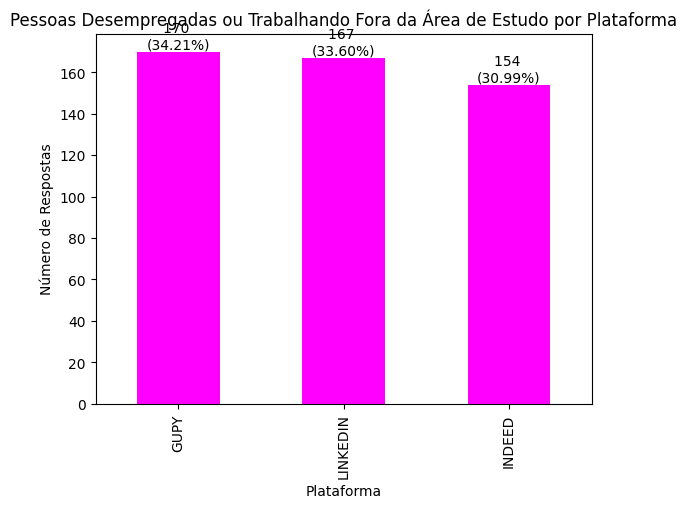

In [262]:
def Plataformas():
    plataformas = df_empreg['FonteEmprego']
    
    contagem_por_plat = plataformas.value_counts()

    
    total_respostas_plat = contagem_por_plat.sum()

    
    porcentagens_por_plat = contagem_por_plat[contagem_por_plat / total_respostas_plat * 100 > 1]

    
    ax = porcentagens_por_plat.plot(kind='bar', color='magenta')
    plt.xlabel('Plataforma')
    plt.ylabel('Número de Respostas')
    plt.title('Pessoas Desempregadas ou Trabalhando Fora da Área de Estudo por Plataforma')

    
    for i in ax.patches:
        quantidade = i.get_height()
        porcentagem = quantidade / total_respostas_plat * 100
        plt.text(i.get_x() + i.get_width() / 2, i.get_height(), f"{quantidade} \n({porcentagem:.2f}%)", ha='center', va='bottom')
    return plt.show()

Plataformas()

###  Semestre

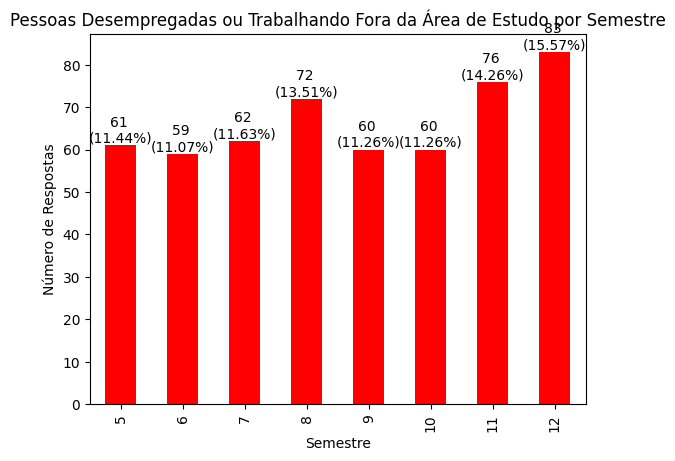

In [263]:
def Semestre():
    por_semestre = df_empreg[ 'SemestreAtual' ][ ( df_empreg['SemestreAtual'] >= 5 ) & ( ( df_empreg[ 'StatusEmpregaticio' ] == 'DESEMPREGADO' ) | ( df_empreg[ 'SeEmpregado' ] == 'FORA DA ÁREA DE ESTUDO' ) ) ]
    
    contagem_por_semestre = por_semestre.value_counts().sort_index()

    
    total_respostas = contagem_por_semestre.sum()

    
    ax = contagem_por_semestre.plot(kind='bar', color='red')
    plt.xlabel('Semestre')
    plt.ylabel('Número de Respostas')
    plt.title('Pessoas Desempregadas ou Trabalhando Fora da Área de Estudo por Semestre')

    
    for i in ax.patches:
        quantidade = i.get_height()
        porcentagem = (quantidade / total_respostas) * 100
        plt.text(i.get_x() + i.get_width() / 2, i.get_height(), f"{quantidade} \n({porcentagem:.2f}%)", ha='center', va='bottom')
    return plt.show()
Semestre()

### Curso

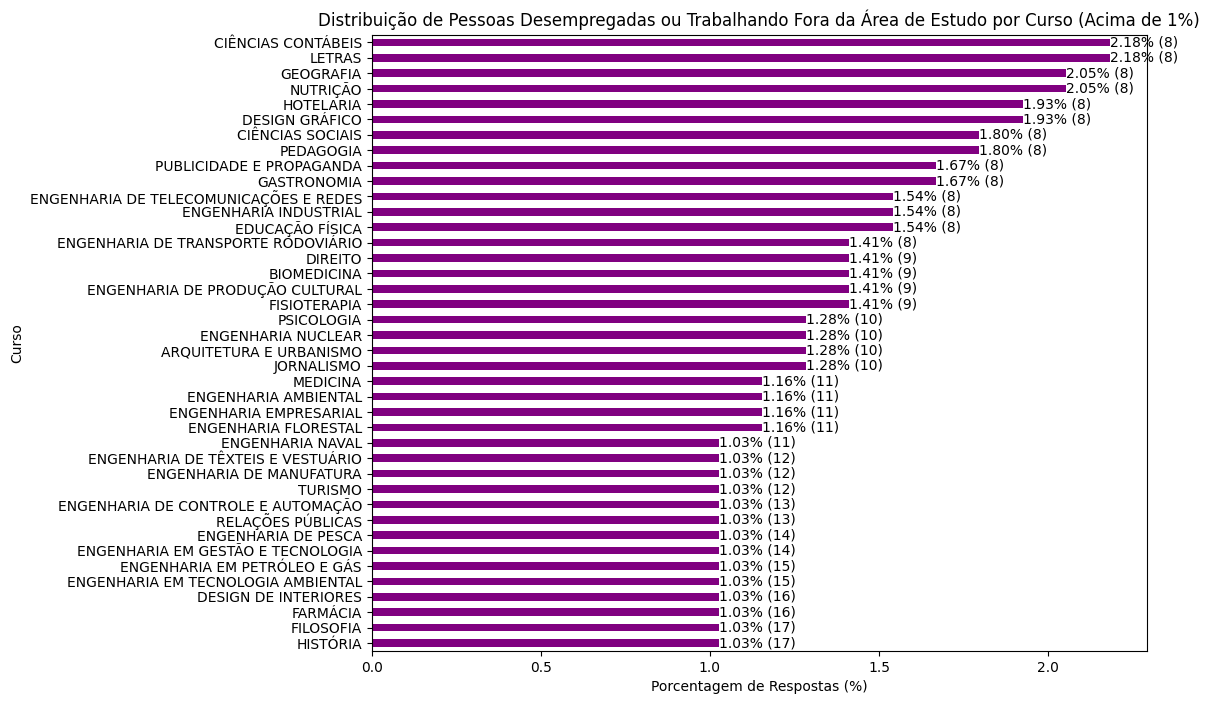

In [264]:
def Curso():
    por_curso = df_empreg[ 'Curso' ][ ( ( df_empreg[ 'StatusEmpregaticio' ] == 'DESEMPREGADO' ) | ( df_empreg[ 'SeEmpregado' ] == 'FORA DA ÁREA DE ESTUDO' ) ) ]
    
    total_respostas = len(por_curso)
    
    
    contagem_por_curso = por_curso.value_counts()
    
    
    porcentagens_por_curso = (contagem_por_curso / total_respostas) * 100
    
    porcentagens_por_curso = porcentagens_por_curso[porcentagens_por_curso > 1]
    
    
    porcentagens_por_curso = porcentagens_por_curso.sort_values(ascending=True)
    
    
    plt.figure(figsize=(10, 8))
    porcentagens_por_curso.plot(kind='barh', color='purple')
    
    
    for i in range(len(porcentagens_por_curso)):
        plt.text(porcentagens_por_curso.iloc[i], i, f'{porcentagens_por_curso.iloc[i]:.2f}% ({contagem_por_curso.iloc[i]})', ha='left', va='center')
    
    plt.xlabel('Porcentagem de Respostas (%)')
    plt.ylabel('Curso')
    plt.title('Distribuição de Pessoas Desempregadas ou Trabalhando Fora da Área de Estudo por Curso (Acima de 1%)')
    return plt.show()
Curso()

### Raça

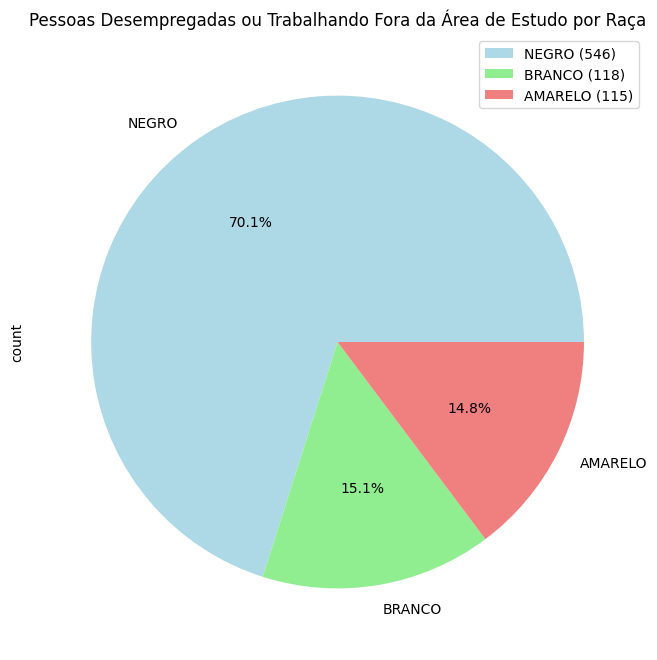

In [265]:
def Raca():
    
    por_raca = df_empreg['Raça'][(df_empreg['StatusEmpregaticio'] == 'DESEMPREGADO') | (df_empreg['SeEmpregado'] == 'FORA DA ÁREA DE ESTUDO')]
    por_raca.replace({'PARDO': 'NEGRO', 'PRETO': 'NEGRO'}, inplace=True)

    
    contagem_por_raca = por_raca.value_counts()

    
    plt.figure(figsize=(8, 8))
    contagem_por_raca.plot(kind='pie', autopct='%1.1f%%', colors=['lightblue', 'lightgreen', 'lightcoral', 'lightskyblue', 'lightpink'])
    plt.title('Pessoas Desempregadas ou Trabalhando Fora da Área de Estudo por Raça')

    
    plt.legend(labels=[f'{raça} ({quantidade})' for raça, quantidade in contagem_por_raca.items()], loc='best')
    return plt.show()
Raca()

### Dificuldades

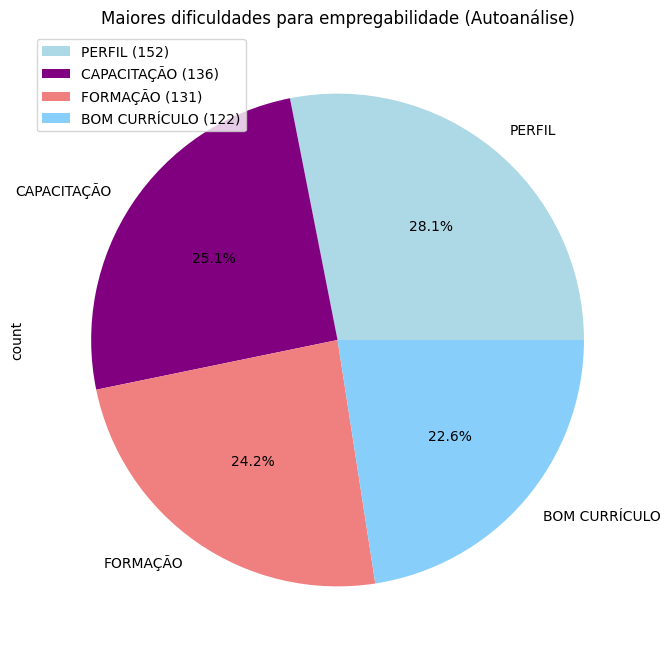

In [266]:
def Motivos():
    
    dificuldades = df_empreg['MaiorDificuldadeEmprego'][(df_empreg['StatusEmpregaticio'] == 'DESEMPREGADO') | (df_empreg['SeEmpregado'] == 'FORA DA ÁREA DE ESTUDO')]
    dificuldades.replace({'PARDO': 'NEGRO', 'PRETO': 'NEGRO'}, inplace=True)

    
    contagem_por_difi = dificuldades.value_counts()

    
    plt.figure(figsize=(8, 8))
    contagem_por_difi.plot(kind='pie', autopct='%1.1f%%', colors=['lightblue', 'purple', 'lightcoral', 'lightskyblue', 'lightpink'])
    plt.title('Maiores dificuldades para empregabilidade (Autoanálise)')

    
    plt.legend(labels=[f'{raça} ({quantidade})' for raça, quantidade in contagem_por_difi.items()], loc='best')
    return plt.show()
Motivos()